# Práctia 3
## Reconocimiento de Patrones y Aprendizaje Automatizado
Pedraza Santiago Uriel


In [1]:
from keras.datasets import mnist
import numpy as np

def balanced_mnist_set():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  #Normalizamos x_train dividiendo cada entrada por 255, el valor maximo de x_train
  x_train = x_train/255

  # Se obtiene una muestra con igual número de: cincos vs no cincos
  # para el conjunto de entrenamiento y el de test
  idx_y_train_5 = np.where(y_train == 5)[0]
  idx_y_train_n5 = np.where(y_train != 5)[0]
  #Se modifica el número de datos de idx_y_train_n5 para que sea igual al número de datos de idx_y_train_5
  idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

  #Se concatenan idx_y_train_5 y idx_y_train_n5 para formar obtener un conjunto de entrenamiento balanceado.
  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
  np.random.shuffle(idx_y_train)

  x_train = x_train[idx_y_train]
  y_train = y_train[idx_y_train]
  #print(x_train.shape)

  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]
  #print(x_test.shape)

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)
  return (x_train, y_train_binary), (x_test, y_test_binary)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))

11490434/11490434 [==============================] - 0s 0us/step
60000


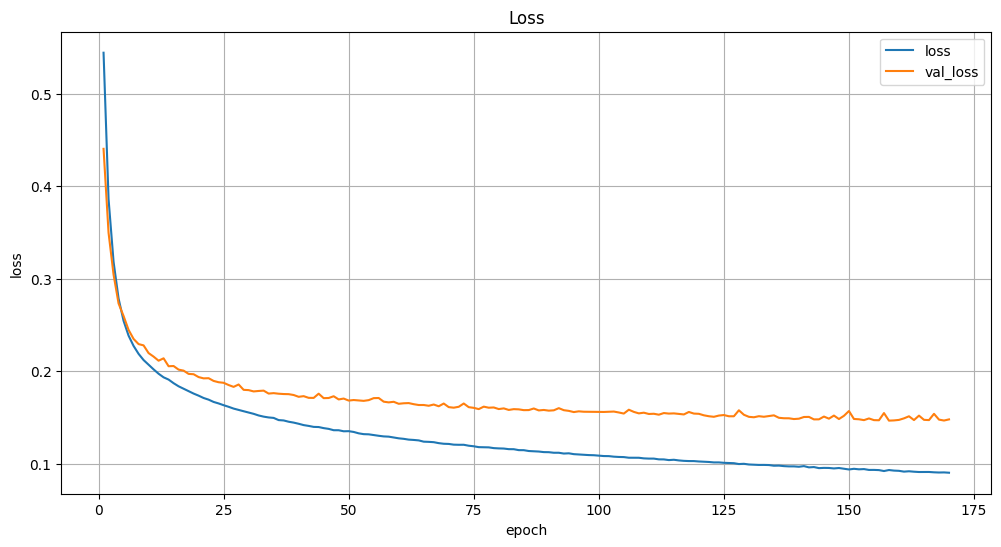

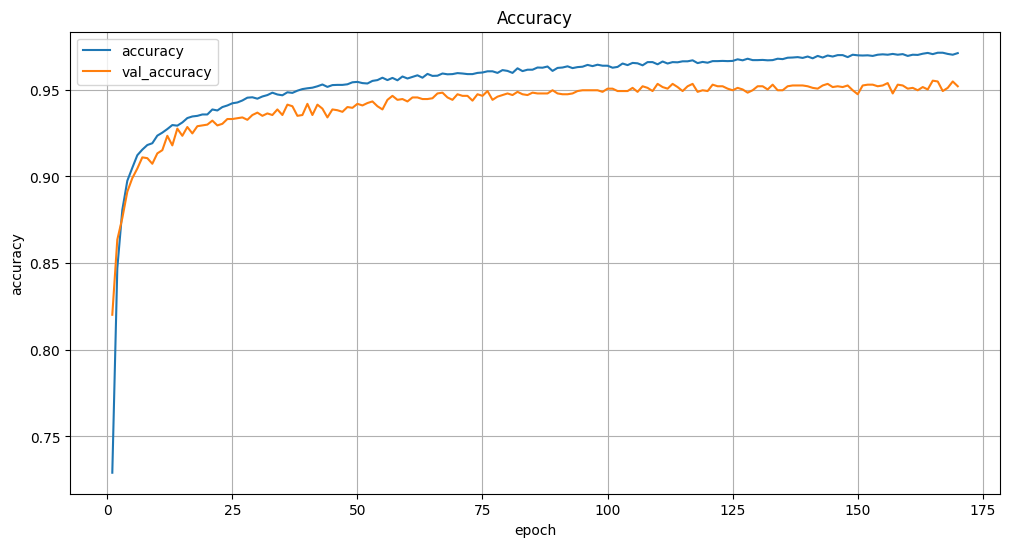

0.9785458879618594 0.9204035874439462 0.9485846331600231 0.9248677248677248 0.9798206278026906 0.9515514425694066


In [3]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score
from keras.callbacks import EarlyStopping

(x_train, y_train_binary), (x_test, y_test_binary) = balanced_mnist_set()
#Red neuronal con dos capas
#2 neuronas en la primer capa
#1 neurona en la capa de salida
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation= 'relu'),
    Dense(1, activation = 'sigmoid')
])

callback = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_binary, epochs=170, verbose=0,
                    batch_size=400, validation_split=0.2)

loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

# Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()


y_pred = (model.predict(x_test, verbose=0) >= 0.5).astype(int)[:,0]

print(precision_score(y_test_binary, y_pred),
      recall_score(y_test_binary, y_pred),
      f1_score(y_test_binary, y_pred),
      precision_score(y_test_binary, y_pred, pos_label=0),
      recall_score(y_test_binary, y_pred, pos_label=0),
      f1_score(y_test_binary, y_pred, pos_label=0))

Se uso *EarlySttoping*, monitoreando la métrica *loss* y con un valor de *patience=3*

El modelo uso hiperparamétros *batch_size=400* y *validation_split=0.2*

56/56 [==============================] - 0s 3ms/step


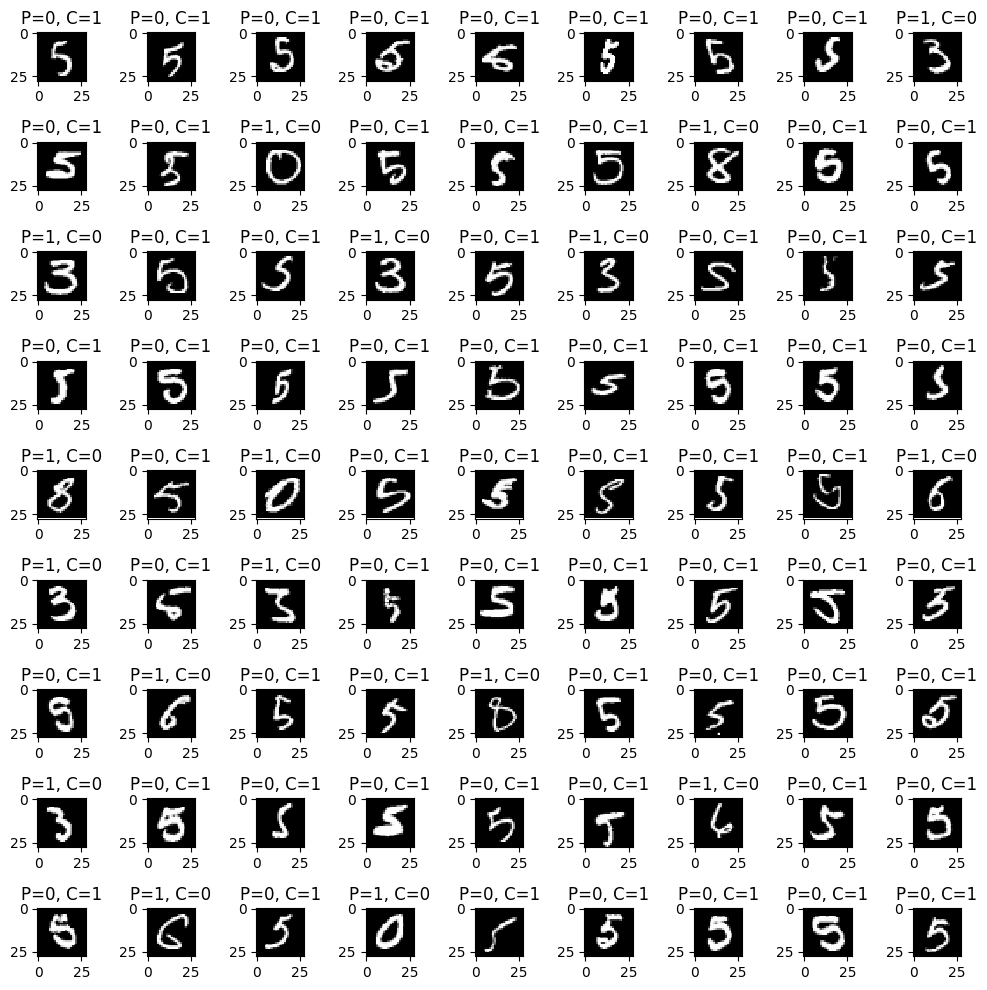

In [12]:
#Imagenes de errores de clasificación del modelo
y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]
incorrect_indices = np.nonzero(y_pred != y_test_binary)[0]
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 81, False)):
    plt.subplot(9,9,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P={}, C={}".format(y_pred[incorrect], y_test_binary[incorrect]))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

Precision:
- Entrenamiento:0.9785458879618594
- Validación: 0.9248677248677248

Recall
- Entrenamiento: 0.9204035874439462
- Validación: 0.9798206278026906

F1-score
- Entrenamiento: 0.9485846331600231
- Validación: 0.9515514425694066